# Example of multiplying weighted skymaps

Import a basic skymap:

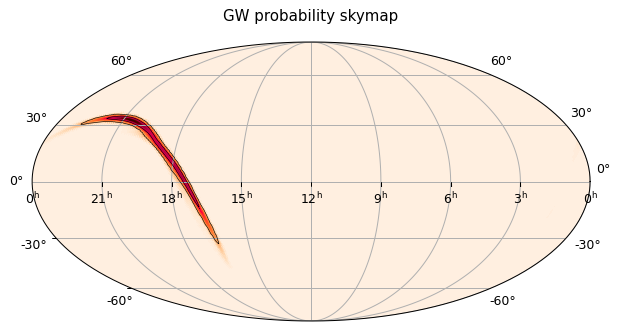

In [8]:
from gototile.skymap import SkyMap

url = 'https://gracedb.ligo.org/api/superevents/S190521r/files/bayestar.fits.gz'
skymap = SkyMap.from_fits(url)

skymap.plot(title='GW probability skymap')

Create a skymap from the GLADE catalog:

/home/martin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


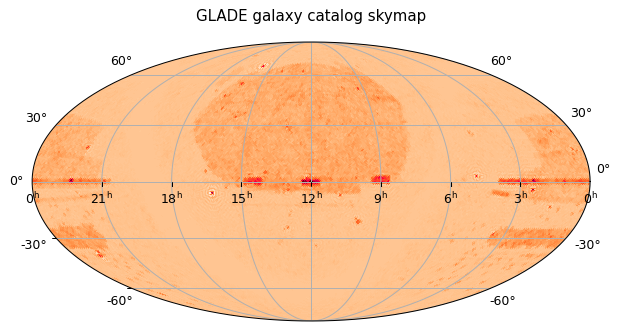

In [9]:
from gototile.catalog import create_catalog_skymap

galaxy_skymap = create_catalog_skymap('GLADE',
                                      dist_mean=skymap.header['distmean'],
                                      dist_err=skymap.header['diststd'],
                                      )

galaxy_skymap.plot(title='GLADE galaxy catalog skymap', plot_contours=False)

Multiply the two skymaps together:

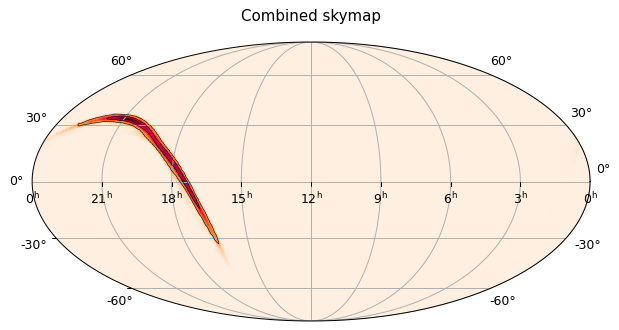

In [10]:
combined_skymap = skymap * galaxy_skymap

combined_skymap.plot(title='Combined skymap')

Create a skymap from the Plank extinction:

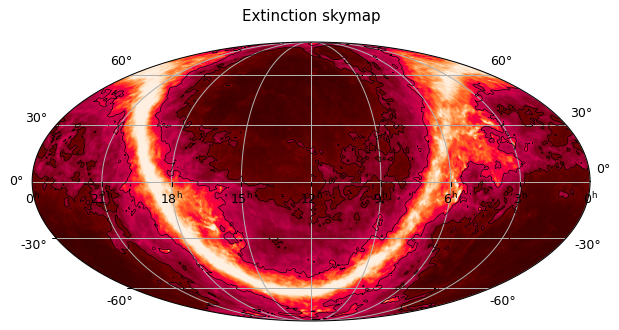

In [11]:
from gototile.extinction import create_extinction_skymap

extinction_skymap = create_extinction_skymap(min_weight=0, exp_k=100)

extinction_skymap.plot(title='Extinction skymap')

Multiply all three skymaps together

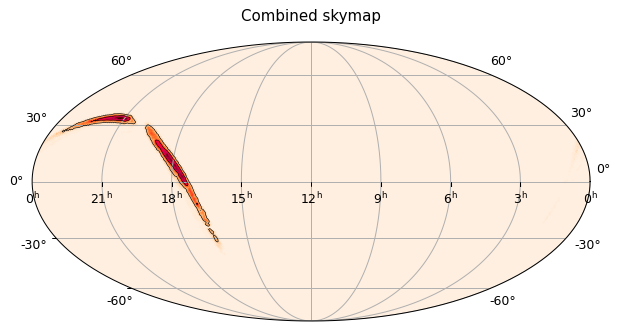

In [7]:
combined_skymap2 = combined_skymap * extinction_skymap

combined_skymap2.plot(title='Combined skymap')